In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from scipy.constants import c

from tracking import *

In [2]:
x = load_file('/tmp/switch.int16')[2*(repeat_samples+calibration_RX_delay_samples):]

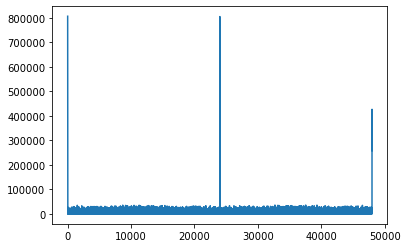

In [3]:
acq = acquire(x)
plt.plot(np.abs(acq['corr']))

In [4]:
# compute code delay from acq
code_delay = -np.argmax(np.abs(acq['corr'])) / acq['corr'].size * 2 * prn.size % prn.size

# short tracking to find secondary code phase
secondary_repeats = 4
tck_test = track(x, code_delay, max_correlations = secondary_repeats * secondary_code.size)

test_symbols = np.average(tck_test['correlations'].real[:secondary_code.size * secondary_repeats].reshape((-1,secondary_code.size)), axis = 0)
sec_corr = [np.sum(test_symbols * np.roll(secondary_code, -j)) for j in range(secondary_code.size)]
secondary_code_phase = np.argmax(np.abs(sec_corr))

tck = track(x, code_delay, secondary_code_phase = secondary_code_phase)

In [5]:
secondary_code_phase

0

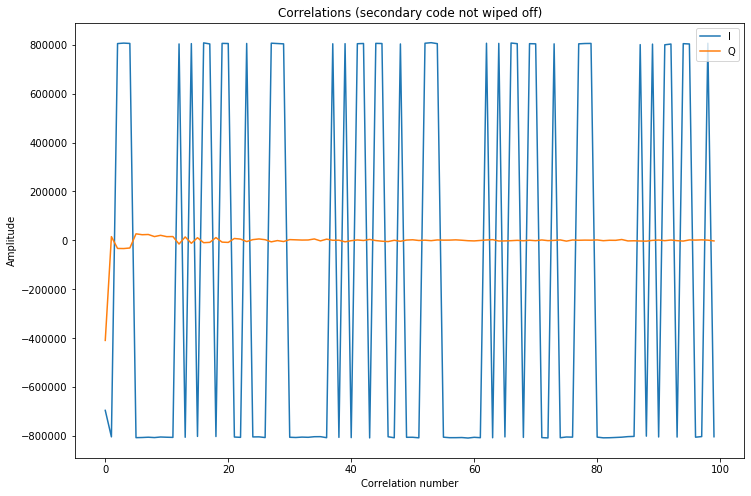

In [6]:
plt.figure(figsize = (12,8), facecolor = 'w')
plt.plot(tck_test['correlations'].real)
plt.plot(tck_test['correlations'].imag)
plt.title('Correlations (secondary code not wiped off)')
plt.ylabel('Amplitude')
plt.xlabel('Correlation number')
plt.legend(['I', 'Q'])

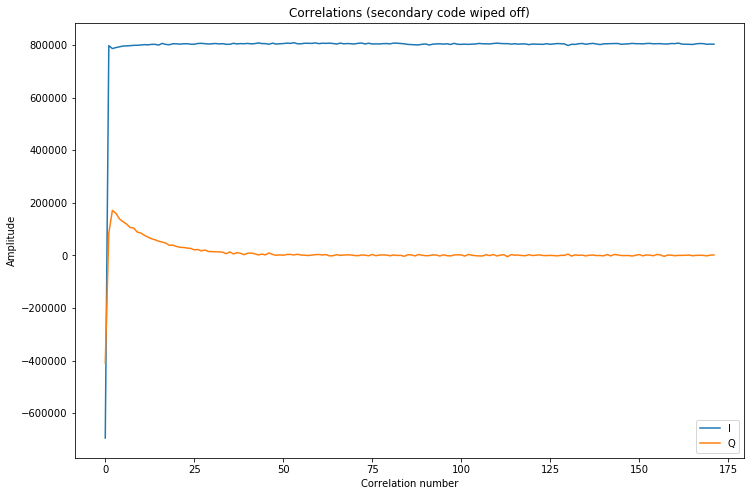

In [7]:
plt.figure(figsize = (12,8), facecolor = 'w')
plt.plot(tck['correlations'].real)
plt.plot(tck['correlations'].imag)
plt.title('Correlations (secondary code wiped off)')
plt.ylabel('Amplitude')
plt.xlabel('Correlation number')
plt.legend(['I', 'Q'])

In [8]:
t = np.arange(tck['freq'].size) * 1e-3

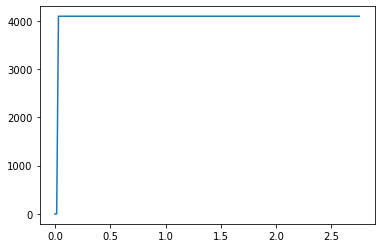

In [9]:
plt.plot(t[::16], tck['code_delay'][::16])

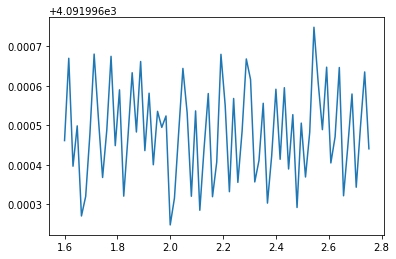

In [10]:
plt.plot(t[::16][100:], tck['code_delay'][::16][100:])

In [11]:
code_delay = np.average(tck['code_delay'][::16][100:])
if code_delay > prn.size / 2:
    code_delay -= prn.size

In [12]:
code_delay / fc * c

-4.12296275718413